In [1]:
%matplotlib inline

Extract segmentation features
=============================

This example shows how to extract segmentation features from the tissue
image.

Features extracted from a nucleus segmentation range from the number of
nuclei per image, over nuclei shapes and sizes, to the intensity of the
input channels within the segmented objects. They are very interpretable
features and provide valuable additional information. Segmentation
features are calculated by using `features = 'segmentation'`, which
calls {func}`squidpy.im.ImageContainer.features_segmentation`.

In addition to `feature_name` and `channels` we can specify the
following `features_kwargs`:

-   `label_layer` - name of label image layer in `img`.
-   `props` - segmentation features that are calculated. See
    [properties]{.title-ref} in `skimage.measure.regionprops_table`.

:::{seealso}
-   {doc}`examples_image_compute_segment_fluo.py` for more
    details on calculating a cell-segmentation.
-   {doc}`examples_image_compute_features.py` for the general
    usage of {func}`squidpy.im.calculate_image_features`.
    
:::


In [3]:
import squidpy as sq

import matplotlib.pyplot as plt

First, let\'s load the fluorescence Visium dataset.


In [4]:
img = sq.datasets.visium_fluo_image_crop()
adata = sq.datasets.visium_fluo_adata_crop()

Before calculating segmentation features, we need to first calculate a
segmentation using `squidpy.im.segment`.


In [5]:
sq.im.segment(img=img, layer="image", layer_added="segmented_watershed", method="watershed", channel=0)

Now we can calculate segmentation features. Here, we will calculate the
following features:

> -   number of nuclei `label`.
> -   mean area of nuclei `area`.
> -   mean intensity of channels 1 (anti-NEUN) and 2 (anti-GFAP) within
>     nuclei `mean_intensity`.

We use `mask_cicle = True` to ensure that we are only extracting
features from the tissue underneath each Visium spot. For more details
on the image cropping, see
`examples_image_compute_crops.py`.


In [6]:
sq.im.calculate_image_features(
    adata,
    img,
    layer="image",
    features="segmentation",
    key_added="segmentation_features",
    features_kwargs={
        "segmentation": {
            "label_layer": "segmented_watershed",
            "props": ["label", "area", "mean_intensity"],
            "channels": [1, 2],
        }
    },
    mask_circle=True,
)

  0%|          | 0/704 [00:00<?, ?/s]

The result is stored in {attr}`adata.obsm['segmentation_features']`.


In [7]:
adata.obsm["segmentation_features"].head()

,segmentation_label,segmentation_area_mean,segmentation_area_std,segmentation_ch-1_mean_intensity_mean,segmentation_ch-1_mean_intensity_std,segmentation_ch-2_mean_intensity_mean,segmentation_ch-2_mean_intensity_std
AAACGAGACGGTTGAT-1,17,174.764706,291.276810,5604.069561,3100.506862,8997.290710,177.888882
AAAGGGATGTAGCAAG-1,14,100.785714,80.946348,5034.146353,1625.737796,10376.489346,564.254124
AAATGGCATGTCTTGT-1,16,132.000000,147.241723,11527.768307,12227.308457,7725.282284,947.987907
AAATGGTCAATGTGCC-1,9,243.000000,132.341310,3581.244911,46.124320,9664.505991,1331.259644
AAATTAACGGGTAGCT-1,7,229.142857,203.573383,9038.077440,8707.493743,10922.808071,3631.149215


Use `squidpy.pl.extract` to plot the texture features on the tissue
image or have a look at [our interactive visualization
tutorial](../../tutorials/tutorial_napari.ipynb) to learn how to use our
interactive `napari` plugin. Here, we show all calculated segmentation
features.


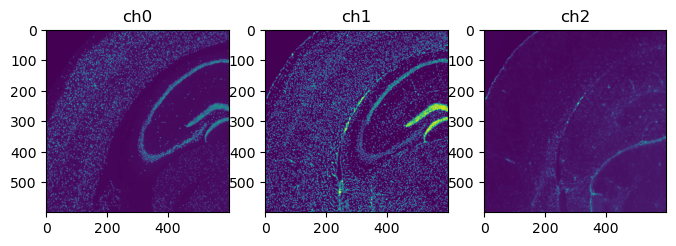

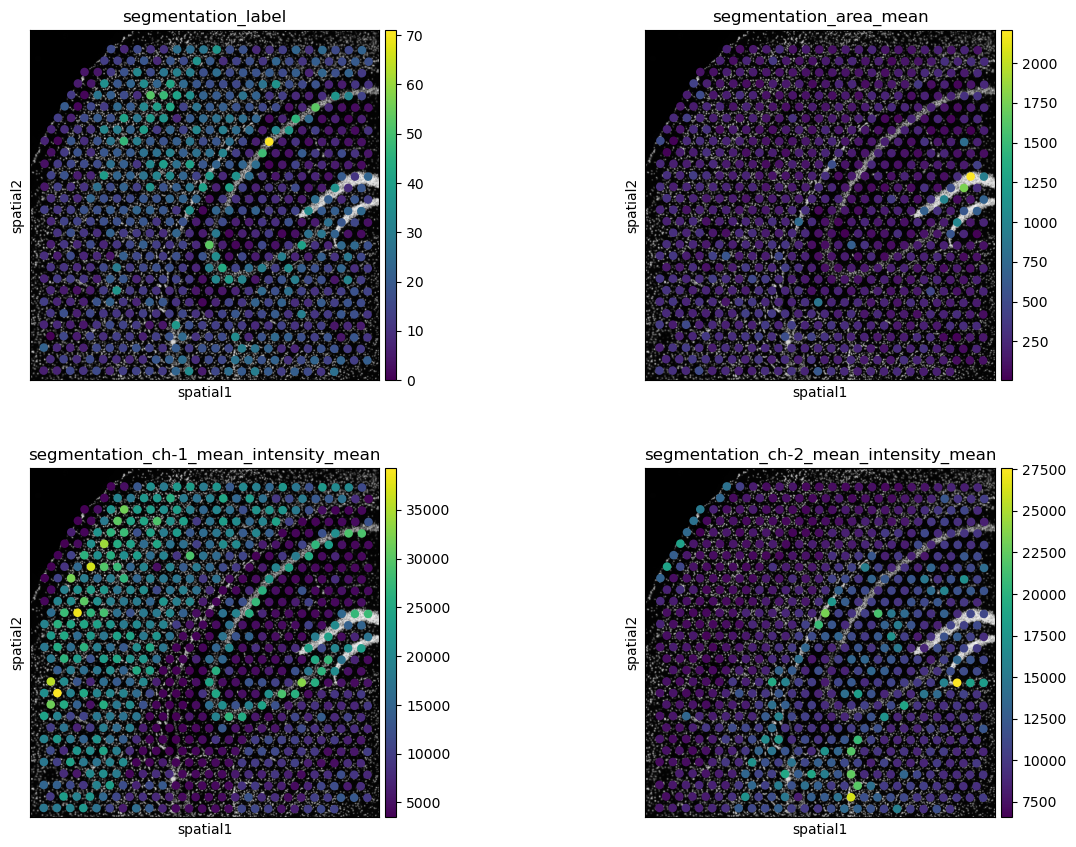

In [8]:
# show all channels (using low-res image contained in adata to save memory)
fig, axes = plt.subplots(1, 3, figsize=(8, 4))
for i, ax in enumerate(axes):
    ax.imshow(adata.uns["spatial"]["V1_Adult_Mouse_Brain_Coronal_Section_2"]["images"]["hires"][:, :, i])
    ax.set_title(f"ch{i}")

# plot segmentation features
sq.pl.spatial_scatter(
    sq.pl.extract(adata, "segmentation_features"),
    color=[
        "segmentation_label",
        "segmentation_area_mean",
        "segmentation_ch-1_mean_intensity_mean",
        "segmentation_ch-2_mean_intensity_mean",
    ],
    img_cmap="gray",
    ncols=2,
)

[segmentation\_label]{.title-ref} shows the number of nuclei per spot
and [segmentation\_area\_mean]{.title-ref} the mean are of nuclei per
spot. The remaining two plots show the mean intensity of channels 1 and
2 per spot. As the stains for channels 1 and 2 are specific to Neurons
and Glial cells, respectively, these features show us Neuron and Glial
cell dense areas.
